<h1><b>Laboratory work 5</b></h1>

<h3><b>Topic:</b> Image processing with the OpenCV library and working with the bunch of 
digital image fil.e</h3>

<h3><b>Goal: </b> get knowledge and skills in digital image processing with OpenCV library 
and processing of a bunch digital images. 
</h3>

<h3><center><b>Progress of work</b></center></h3>

In [64]:
pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
    --------------------------------------- 0.5/38.8 MB 5.6 MB/s eta 0:00:07
   -- ------------------------------------- 2.6/38.8 MB 9.4 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/38.8 MB 6.5 MB/s eta 0:00:06
   ----- ---------------------------------- 5.0/38.8 MB 6.9 MB/s eta 0:00:05
   ------ --------------------------------- 6.6/38.8 MB 7.2 MB/s eta 0:00:05
   ------- -------------------------------- 7.3/38.8 MB 6.3 MB/s eta 0:00:06
   -------- ------------------------------- 8.1/38.8 MB 6.1 MB/s eta 0:00:06
   ---------- ----------------------------- 10.2/38.8 MB 6.5 MB/s eta 0:00:05
   ------------- -------------------------- 12.8/38.8 MB 7.2 MB/s eta 0:00:04
   --------------- ------------------------ 15.2/38.8 MB 7.7 MB/s eta 0:00:04
   ------------------ --------------------- 17.6/38.8 MB 8.0 MB/s eta 0:00:03
   -------------------- ------------------- 19.9/38.8 MB 8.3 MB/s eta 0:00:03
 

In [23]:
import cv2

In [24]:
import os

In [25]:
import glob

In [26]:
import random

In [27]:
import base64

In [28]:
import pandas as pd

In [29]:
import numpy as np

In [30]:
from PIL import Image

In [31]:
from IPython.display import HTML

In [32]:
from io import BytesIO

<h5><b>Assignment 1: </b>  Create a function that takes the path to a folder on disk as an argument and 
returns a dataframe with the following information about the images in the folder:
    <ul>
<li> file name </li>
<li> color model </li>
<li> format </li>
<li> the number of channels in the image </li>
<li> file size in megabytes, rounded to two decimal places </li>
<li> image width </li>
<li> image height </li>
<li> full path to the file </li>
<li> image thumbnail </li>
    </ul>
</h5>

In [33]:
def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    
    if im.mode == 'RGBA':
        im = im.convert('RGB')
    
    with BytesIO() as buffer:
        im.save(buffer, 'JPEG')
        return base64.b64encode(buffer.getvalue()).decode()

def get_thumbnail(image_path):
    with Image.open(image_path) as img:
        img.thumbnail((100, 100))
        return img.copy()

In [34]:
def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

In [35]:
def to_dataframe(folder_path):
    # Creating list to store image data
    image_data = []

    # Getting all the files in the folder
    files = glob.glob(os.path.join(folder_path, '*'))

    # Iterating throw each file
    for file_path in files:
        try:
            with Image.open(file_path) as img:
                file_name = os.path.basename(file_path)
                color_model = img.mode
                img_format = img.format
                num_channels = len(img.getbands())
                file_size_mb = round(os.path.getsize(file_path) / (1024 * 1024), 2)
                width, height = img.size
                full_path = os.path.abspath(file_path)
                thumbnail = img.copy()
                thumbnail.thumbnail((100, 100))

                # Appending details to image_data
                image_data.append({
                    'name': file_name,
                    'color model': color_model,
                    'format': img_format,
                    'channels': num_channels,
                    'size': file_size_mb,
                    'width': width,
                    'height': height,
                    'full path': full_path,
                    'image': thumbnail
                })
        except (IOError, OSError):
            pass

    df = pd.DataFrame(image_data)
    return df

In [36]:
dff = to_dataframe(r"D:\uni\3year\pdp\images2")

,name,color model,format,channels,size,width,height,full path,image
0,1.png,RGBA,PNG,4,0.70,967,601,D:\uni\3year\pdp\images2\1.png,
1,2.jpeg,RGB,JPEG,3,0.05,718,750,D:\uni\3year\pdp\images2\2.jpeg,
2,2.PNG,RGBA,PNG,4,0.47,716,450,D:\uni\3year\pdp\images2\2.PNG,
3,3.jpg,RGB,JPEG,3,0.06,730,411,D:\uni\3year\pdp\images2\3.jpg,
4,4.jpg,RGB,JPEG,3,0.03,700,394,D:\uni\3year\pdp\images2\4.jpg,
5,5.jpg,RGB,JPEG,3,0.04,700,394,D:\uni\3year\pdp\images2\5.jpg,
6,6.jpg,RGB,JPEG,3,0.07,800,533,D:\uni\3year\pdp\images2\6.jpg,
7,8.PNG,RGBA,PNG,4,0.56,960,463,D:\uni\3year\pdp\images2\8.PNG,
8,9.PNG,RGBA,PNG,4,0.21,578,372,D:\uni\3year\pdp\images2\9.PNG,

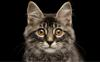
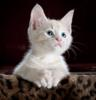
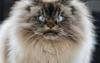
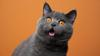
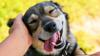
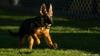
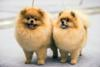
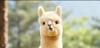
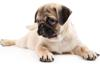

In [37]:
HTML(dff.to_html(formatters={'image': image_formatter}, escape=False))

<h5><b>Assignment 2: </b>  Create a poster from the images in the folder using the OpenCV library.</h5>

<h5><b>Task 1: </b>  Create a function that takes following arguments:    <ul>
        <li>  the path to the folder </li>
        <li>  name of output image file </li>
        <li> the number of images in a row </li>
        <li>  the number of images in a clumno </li>    
</ul
    
and returns the poster image. 
We assume that the poster is rectangular and the number of pictures in the poster xs x
a  b, where a is the number of columns and b is the numbfer o  row5.5
</h6>

In [50]:
def create_poster(folder_path, output_image_name, images_per_row, images_per_col):
    target_size = 250
    files = glob.glob(os.path.join(folder_path, '*'))
    poster_width = images_per_row * target_size
    poster_height = images_per_col * target_size
    poster = Image.new('RGB', (poster_width, poster_height))

    for row in range(images_per_col):
        for col in range(images_per_row):
            random_file = random.choice(files)
            try:
                with Image.open(random_file) as img:
                    img = crop_to_square(img, target_size)
                    img = apply_random_filter(img)
                    x = col * target_size
                    y = row * target_size
                    poster.paste(img, (x, y))
            except (IOError, OSError):
                pass

    poster.save(output_image_name)
    return poster

<h5><b>Task 2: </b>  Create a function that converts the picture into a square with the maximum 
possible side size (for example, for the picture 80 x 533, the output size should be 
5 x 3533). We crop image on both sides, that is, we calculate the size from the 
image center.
</h5>

In [51]:
def crop_to_square(image, size=500):
    width, height = image.size
    new_dim = min(width, height)
    left = (width - new_dim) // 2
    top = (height - new_dim) // 2
    right = left + new_dim
    bottom = top + new_dim
    image = image.crop((left, top, right, bottom))
    return image.resize((size, size), Image.Resampling.LANCZOS)

<h5><b>Task 3: </b>"Filter" the image with red, green, blue, yellow, magenta, or cyan colors, which 
are also randomly selected and may repeat.</h5>

In [52]:
def apply_random_filter(image):
    img_np = np.array(image)
    filters = {
        'red': [1, 0, 0],
        'green': [0, 1, 0],
        'blue': [0, 0, 1],
        'yellow': [1, 1, 0],
        'magenta': [1, 0, 1],
        'cyan': [0, 1, 1]
    }
    color_filter = filters[random.choice(list(filters.keys()))]
    for i in range(3):
        img_np[:, :, i] = img_np[:, :, i] * color_filter[i]
    return Image.fromarray(img_np)

<h5><b>Output:</b></h5>

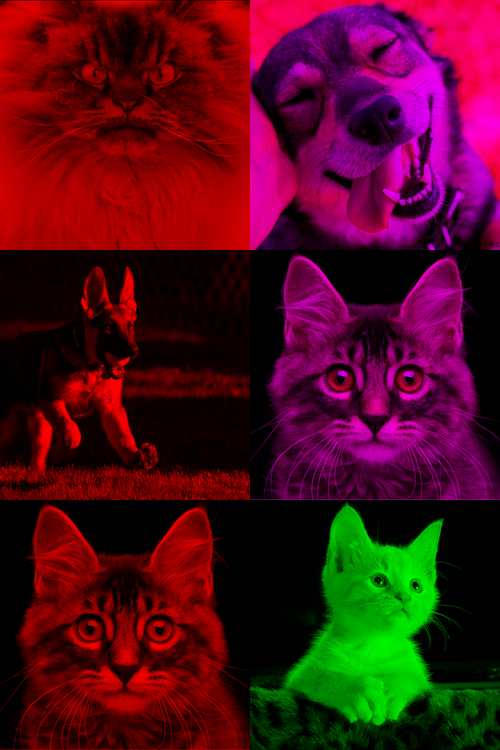

In [53]:
img = create_poster(r"D:\uni\3year\pdp\images2", "One.jpg", 2, 3)
img

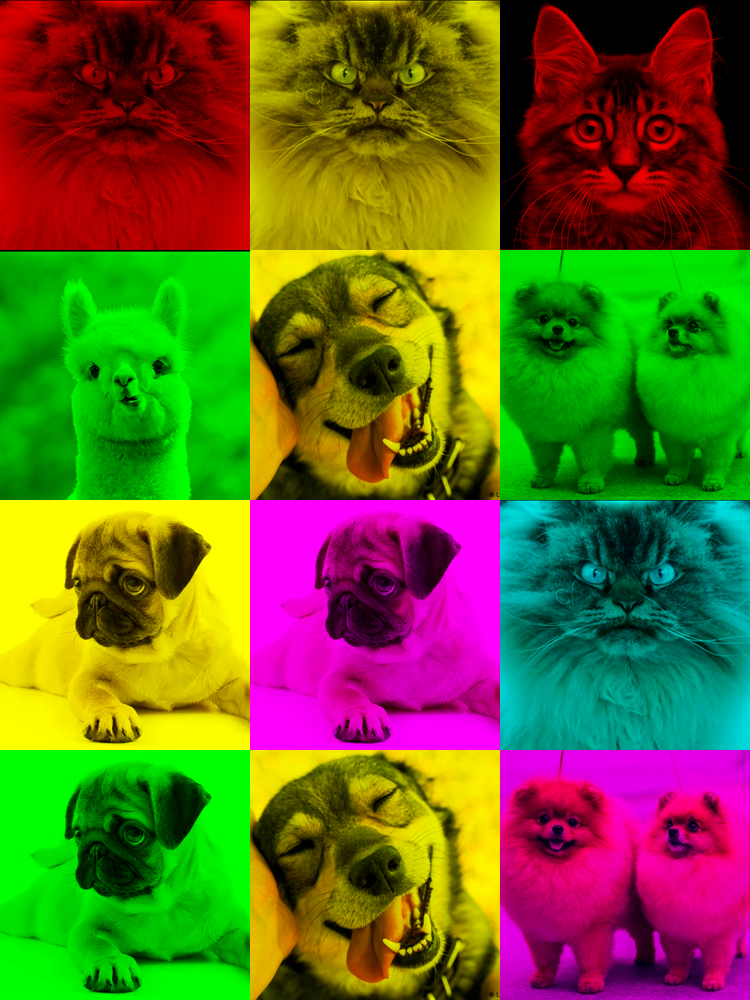

In [54]:
img = create_poster(r"D:\uni\3year\pdp\images2", "Two.jpg", 3, 4)
img

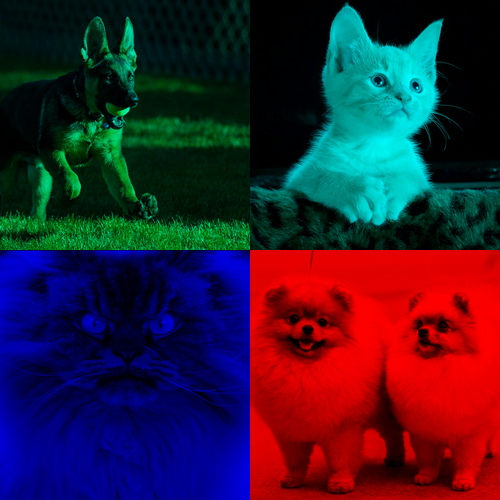

In [55]:
img = create_poster(r"D:\uni\3year\pdp\images2", "Three.jpg", 2, 2)
img

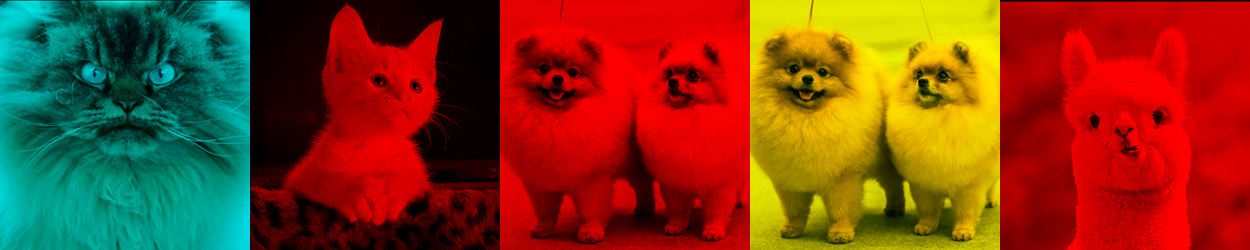

In [56]:
img = create_poster(r"D:\uni\3year\pdp\images2", "Four.jpg", 5, 1)
img

<h4><b>Conclusion: </b>during this laboratory work i got knowledge how to work with images and bunch of images in Jupyter notebook using OpenCV library.</h4>